In [194]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support as score
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [163]:
noiseLevels =  [0.05, 0.1, 0.2, 0.3, 0.4,  0.5, 0.6, 0.7]
models = [ 'AENN(df)' 
            ,'BBNR(df, k = k)'
           ,'C45robustFilter(df)'
           ,'CNN(df)'
           ,'CVCF(df, nfolds = nfolds, consensus = FALSE)'
           ,'dynamicCF(df, nfolds = nfolds, consensus = FALSE, m = 3)'
           ,'edgeBoostFilter(df, m = 15, percent = 0.05, threshold = 0.2)'
           ,'EF(df, nfolds = nfolds, consensus = FALSE)'
           ,'ENG(df, graph = "RNG")'
           ,'GE(df, k = k, kk = ceiling(k/2))'
           ,'HARF(df, nfolds = nfolds, agreementLevel = 0.7, ntrees = 500)'
           ,'hybridRepairFilter(df, consensus = FALSE, noiseAction = "remove")'
           ,'IPF(df, nfolds = nfolds, consensus = FALSE, p = 0.01, s = 3, y = 0.5)'
           ,'ORBoostFilter(df, N = 20, d = 11, Naux = max(20, N), useDecisionStump = FALSE)'
           ,'PF(df, nfolds = nfolds, consensus = FALSE, p = 0.01, s = 3, y = 0.5, theta = 0.7)'
           ,'PRISM(df)'
           ,'RNN(df)'
]


In [186]:
## True labels in the last column of the dataset
name = 'Iris'
df = pd.read_csv(name+'.csv',sep = "\t",header = None)
labelsTrue = df.iloc[:,-1]

# Noisy labels are saved separetely for all noise levels
labelsAll = pd.read_csv(name+"_NoisyLabels.csv", sep = "\t")

# Predictions of models for this dataset: index of data predicted as noisy
predictions =  pd.read_csv(name+'_predictions.csv',sep = "\t",header = None)
print(predictions.shape)
predictions[0] = predictions[0].str.split('(',expand = True)[0]
predictions = predictions.replace('failed!',np.nan)
predictions = predictions[~predictions[2].isna()]
predictions = predictions.reset_index(drop = True)
predictions.columns = ['model','noiseLevel','noisyIndex']
#predictions = predictions.drop_duplicates(['model','noiseLevel'], keep='last')
predictions.head()

(141, 3)


,model,noiseLevel,noisyIndex
0,ORBoostFilter,0.6,"1, 2, 3, 4, 5, 8, 10, 11, 12, 13, 14, 21, 25, ..."
1,CNN,0.1,"2, 3, 4, 5, 6, 8, 10, 11, 13, 14, 15, 19, 20, ..."
2,ORBoostFilter,0.5,"3, 4, 6, 8, 13, 14, 15, 16, 17, 19, 20, 24, 27..."
3,ORBoostFilter,0.7,"1, 2, 5, 6, 7, 8, 9, 11, 12, 16, 19, 26, 28, 3..."
4,CNN,0.6,"4, 8, 14, 19, 25, 28, 34, 47, 48, 50, 60, 62, ..."


In [199]:
li = []
li2 = []
for i in range(len(predictions)):
    
    noiseLevel = str(predictions.iloc[i,1])
    labelsNoisy = labelsAll[noiseLevel]
    
    trueNoise = pd.Series([0]*len(labelsNoisy))
    trueNoise[labelsTrue!=labelsNoisy]=1

    
    predictedNoise = pd.Series([0]*len(labelsNoisy))
   # ind = pd.Series([int(s) for s in predictions.iloc[i,2].split(',')])-1
    temp = pd.Series(predictions.iloc[i,2].split(','))
    ind = temp[temp.str.strip().str.isdigit()].astype(int)-1 # -1 since R indiced are 1-based
    predictedNoise[ind]=1
    
    tn, fp, fn, tp = confusion_matrix(trueNoise,predictedNoise).ravel()

    l = score(trueNoise, predictedNoise, average = 'binary')[:3]
    li.append(l)
    
    li2.append([tn, fp, fn, tp])
    #print(score(trueNoise, predictedNoise, average = 'binary'))

    
predictions[['precision','recall','fscore']]= pd.DataFrame(li)
predictions[['tn', 'fp', 'fn', 'tp']]= pd.DataFrame(li2)


In [200]:
predictions

,model,noiseLevel,noisyIndex,precision,recall,fscore,tn,fp,fn,tp
0,ORBoostFilter,0.60,"1, 2, 3, 4, 5, 8, 10, 11, 12, 13, 14, 21, 25, ...",0.593023,0.566667,0.579545,25,35,39,51
1,CNN,0.10,"2, 3, 4, 5, 6, 8, 10, 11, 13, 14, 15, 19, 20, ...",0.000000,0.000000,0.000000,56,79,15,0
2,ORBoostFilter,0.50,"3, 4, 6, 8, 13, 14, 15, 16, 17, 19, 20, 24, 27...",0.060606,0.053333,0.056738,13,62,71,4
3,ORBoostFilter,0.70,"1, 2, 5, 6, 7, 8, 9, 11, 12, 16, 19, 26, 28, 3...",0.858974,0.638095,0.732240,34,11,38,67
4,CNN,0.60,"4, 8, 14, 19, 25, 28, 34, 47, 48, 50, 60, 62, ...",0.485714,0.188889,0.272000,42,18,73,17
...,...,...,...,...,...,...,...,...,...,...
115,ENG,0.40,"2, 9, 10, 13, 18, 21, 23, 26, 28, 30, 33, 37, ...",0.718750,0.766667,0.741935,72,18,14,46
116,ENG,0.50,"2, 7, 9, 10, 11, 13, 15, 16, 17, 21, 23, 26, 2...",0.636364,0.560000,0.595745,51,24,33,42
117,ENG,0.05,"7, 23, 28, 30, 60, 64, 74, 84, 92, 104, 107, 1...",0.500000,1.000000,0.666667,136,7,0,7
118,ENG,0.10,"7, 23, 28, 30, 36, 43, 44, 60, 62, 64, 74, 83,...",0.625000,1.000000,0.769231,126,9,0,15


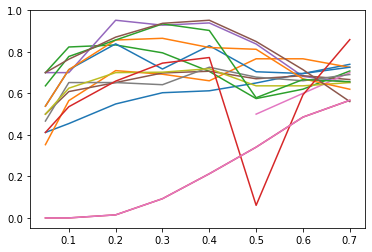

In [201]:

for model in models:
    model =  model.split('(')[0]
    table = predictions[predictions['model']==model].sort_values('noiseLevel')
    plt.plot(table['noiseLevel'],table['precision'],label = model)

In [202]:
predictions.sort_values(['model','noiseLevel'])

,model,noiseLevel,noisyIndex,precision,recall,fscore,tn,fp,fn,tp
19,AENN,0.05,"7, 28, 30, 60, 64, 69, 71, 73, 74, 79, 84, 92,...",0.411765,1.000000,0.583333,133,10,0,7
20,AENN,0.10,"7, 28, 30, 36, 43, 44, 56, 60, 62, 64, 68, 69,...",0.454545,1.000000,0.625000,117,18,0,15
10,AENN,0.20,"2, 7, 11, 12, 25, 26, 28, 30, 36, 43, 44, 49, ...",0.549020,0.933333,0.691358,97,23,2,28
6,AENN,0.30,"2, 9, 11, 21, 23, 26, 28, 30, 32, 33, 34, 36, ...",0.603175,0.844444,0.703704,80,25,7,38
14,AENN,0.40,"1, 2, 9, 10, 11, 13, 18, 21, 23, 28, 30, 32, 3...",0.612500,0.816667,0.700000,59,31,11,49
...,...,...,...,...,...,...,...,...,...,...
68,hybridRepairFilter,0.30,"7, 9, 12, 21, 23, 25, 26, 28, 30, 33, 36, 37, ...",0.865385,1.000000,0.927835,98,7,0,45
74,hybridRepairFilter,0.40,"2, 7, 9, 10, 12, 18, 21, 23, 25, 26, 28, 30, 3...",0.820896,0.916667,0.866142,78,12,5,55
73,hybridRepairFilter,0.50,"1, 2, 5, 7, 9, 10, 11, 12, 18, 21, 22, 23, 25,...",0.812500,0.866667,0.838710,60,15,10,65
72,hybridRepairFilter,0.60,"2, 6, 9, 10, 11, 15, 16, 17, 18, 20, 21, 22, 2...",0.670103,0.722222,0.695187,28,32,25,65
